In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


### Reading and Understanding the Data

In [2]:
# reading the csv file 
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# inspecting rows & columns
day.shape

(730, 16)

In [4]:
# Checking the columns in dataset
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Checking the numerical variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking is there any missing values - no missing values found. 
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# converting the datatype of  dteday column 
day['dteday'].dtype

dtype('O')

In [9]:
day['dteday'] =  pd.to_datetime(day['dteday'],dayfirst = True)
day['dteday'].dtype

dtype('<M8[ns]')

In [10]:
# dtype of categorical columns needs to be changed to object
def obj_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

day[['mnth']] = day[['mnth']].apply(obj_map) 

In [11]:
def obj_map(x):
    return x.map({0: '2018', 1:'2019'})
day[['yr']] = day[['yr']].apply(obj_map) 

In [12]:
def obj_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day[['season']] = day[['season']].apply(obj_map) 

In [13]:
def obj_map(x):
    return x.map({0:'Holiday', 1:'WorkingDay'})
day[['workingday']] = day[['workingday']].apply(obj_map) 

In [14]:
def obj_map(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
day[['weathersit']] = day[['weathersit']].apply(obj_map) 

In [15]:
def obj_map(x):
    return x.map({0:'Sunday', 1:'Monday', 2: 'Tuesday',3:'Wednesday', 4:'Thursday',5:'Friday',6: 'Saturday'})
day[['weekday']] = day[['weekday']].apply(obj_map)

In [16]:
day.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
#Dropping Holiday as the workingday column covers it. 
day.drop('holiday',axis=1,inplace=True)

In [18]:
# dropping the dteday  and instant columns.

day.drop(['dteday','instant'],axis=1,inplace=True)

In [19]:
day.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

### Visualising the Data

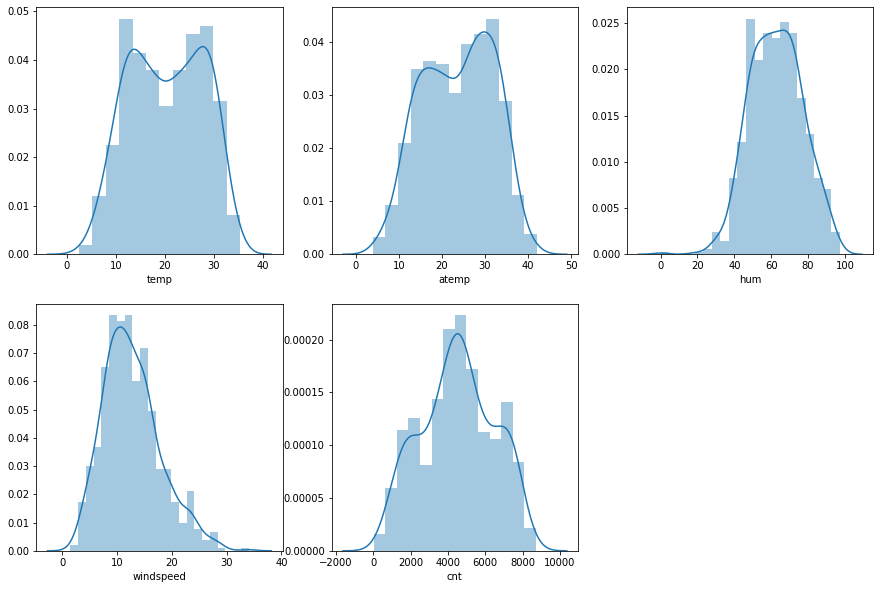

In [20]:
# Visualization

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.distplot(day['temp'])
plt.subplot(2,3,2)
sns.distplot(day['atemp'])
plt.subplot(2,3,3)
sns.distplot(day['hum'])
plt.subplot(2,3,4)
sns.distplot(day['windspeed'])
plt.subplot(2,3,5)
sns.distplot(day['cnt'])
plt.show()

#### Inferences:-
 
- Temp and atemp are very similar to each other, may be there is similiar correlations. 
- Windspeed and Humidity variable can be seen as normal Distribution.


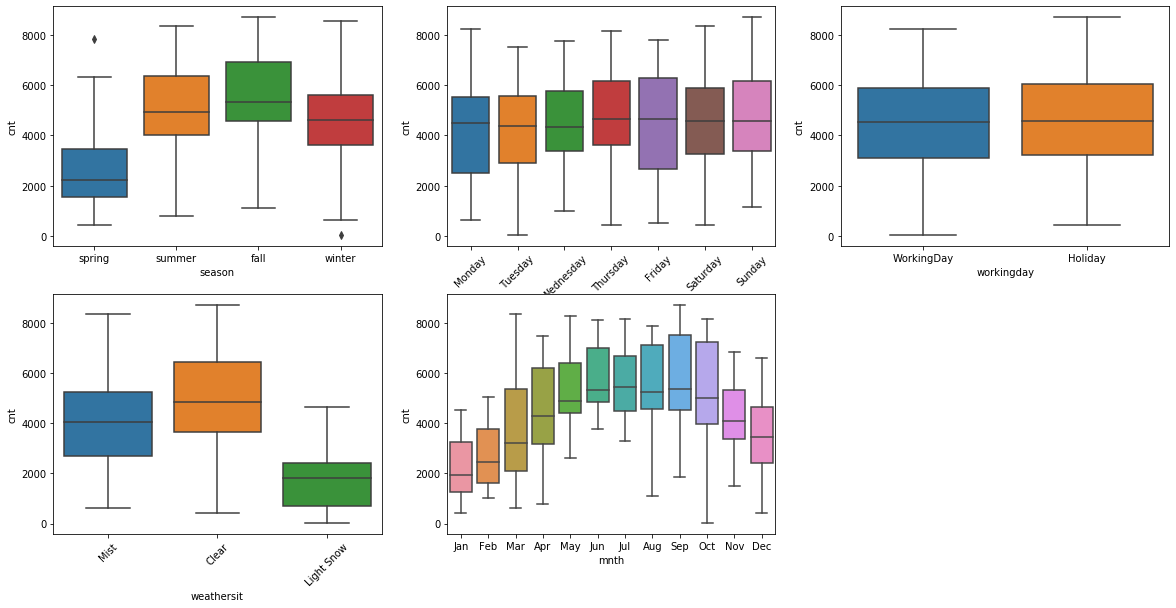

In [21]:
# Visualising Categorical Variables
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=day)
plt.subplot(3,3,2)
plt.xticks(rotation=45)
sns.boxplot(x = 'weekday',y='cnt',data=day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday',y='cnt',data=day)
plt.subplot(3,3,4)
plt.xticks(rotation=45)
sns.boxplot(x = 'weathersit',y='cnt',data=day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth',y='cnt',data=day)
plt.show();

#### Inferences:-
- As per Season the number of bike rentals  in the spring  is lowest while the number of bike rentals in fall is higgest and summer as well winter the number is almost same.
- The number of rentals in month of august - october are highest.
- Accourding to weatherlist when there is light snow the demand is lowest and highest when the weather is clear.
- It can be seen that is not much difference in demand during weekdays and holidays.

In [22]:
# checking the numerical columns 
day.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

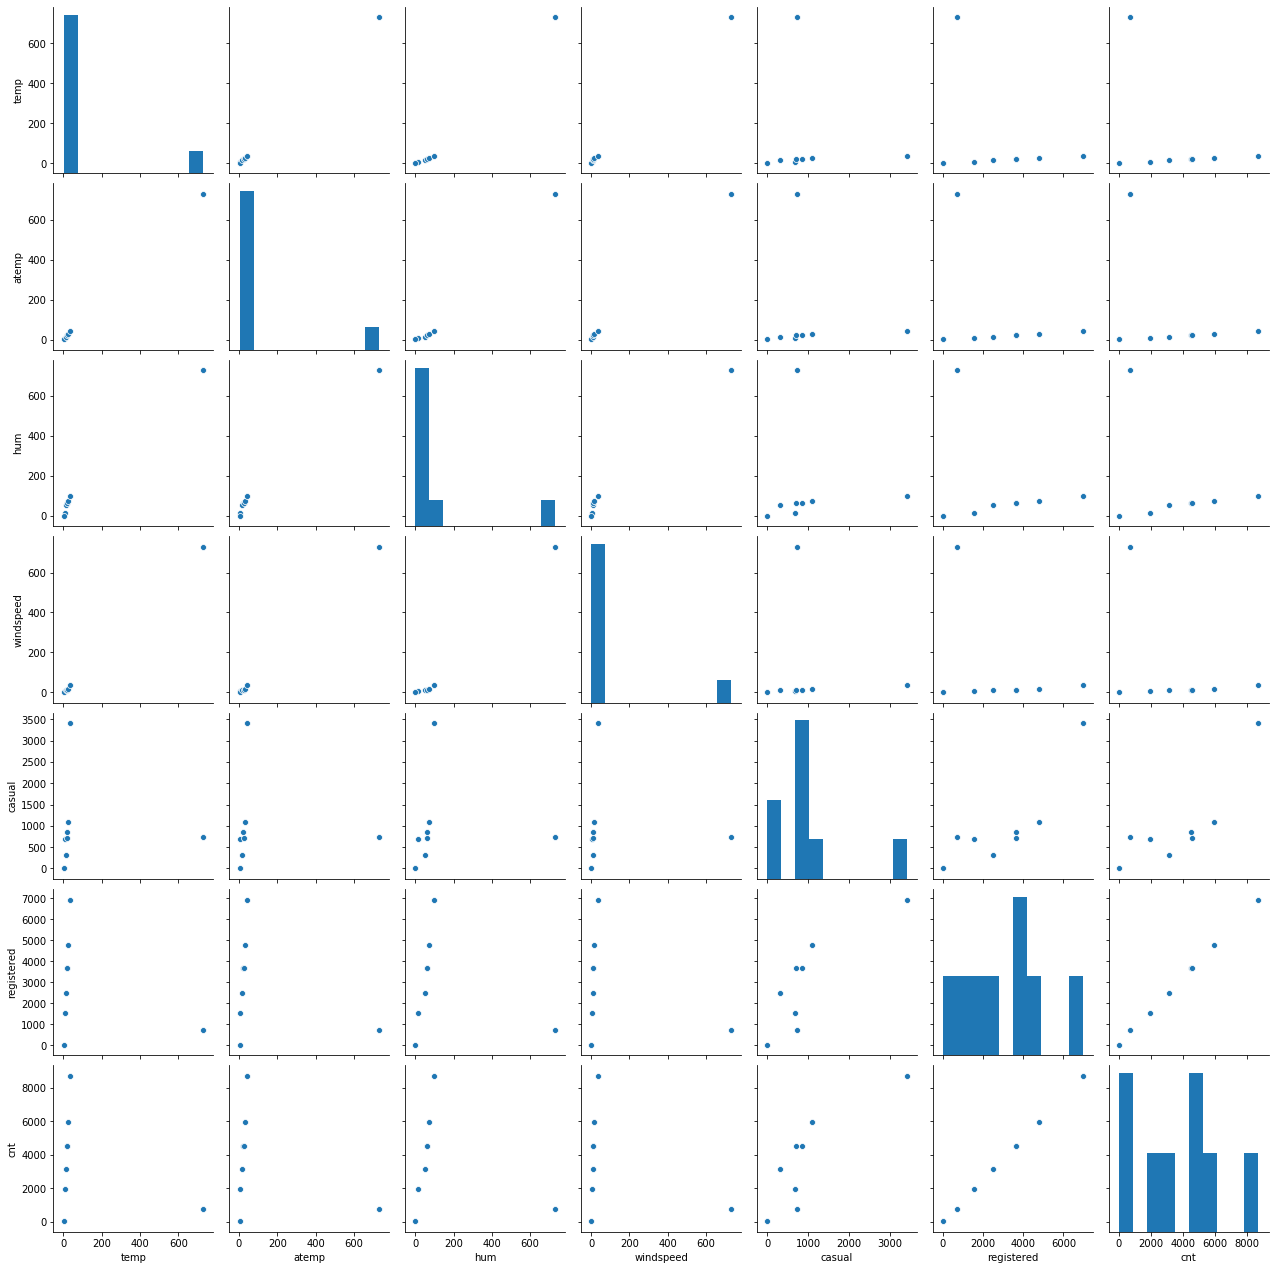

In [23]:
# Plotting  Pair-PLot of continuos variables
sns.pairplot(day.describe())
plt.show()

#### Inferences:-
- casual and registered have the highest correlation to dependent variable cnt
- Humidity has very low correlation with cnt



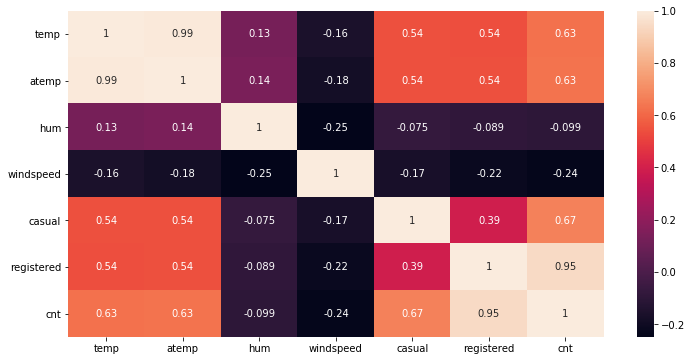

In [24]:
# Ploting heatmap to find correlation
plt.figure(figsize = (12,6))
sns.heatmap(day.corr(),annot=True)
plt.show()

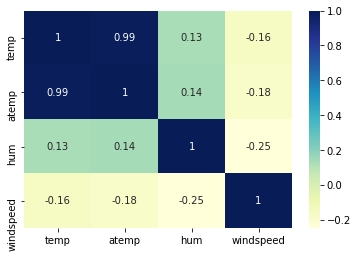

In [25]:
# Plotting heatmap 
numeric = day[['temp','atemp','hum','windspeed']]
sns.heatmap(numeric.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [26]:
# To avoid Multicolinearity dropping atemp column
day.drop('atemp', axis=1,inplace=True)

In [27]:
# Dropping casual and registered columns
day.drop(['casual','registered'], axis=1,inplace=True)

In [28]:
day.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Monday,WorkingDay,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Tuesday,WorkingDay,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Wednesday,WorkingDay,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Thursday,WorkingDay,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Friday,WorkingDay,Clear,9.305237,43.6957,12.522300,1600


#### Dealing With Categorical Variables

In [29]:
df_categorical = day.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [30]:
# Creating dummies for categorical variables
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_WorkingDay,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Concating the dummy variables first 
day = pd.concat([day, df_dummies],axis=1)
# Then dropping the categorical variables as they are already dummy-encoded.
day.drop(df_categorical,axis=1,inplace=True)
day.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_WorkingDay,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [33]:
#Scaling of the numerical features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [34]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

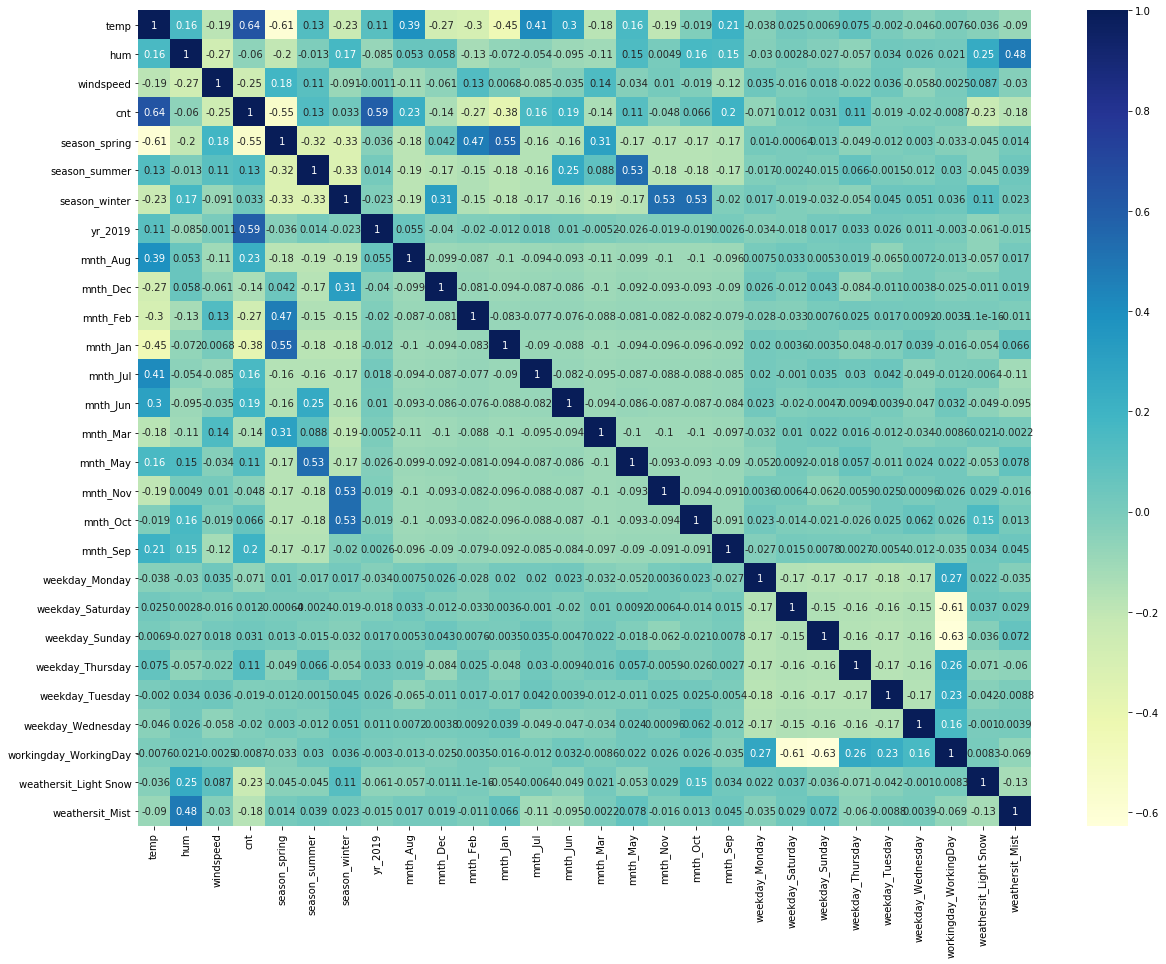

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

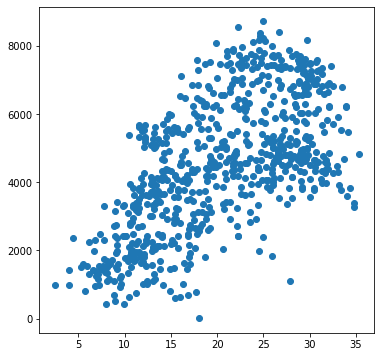

In [36]:
# temp seems to the correlated to cnt the most. 
plt.figure(figsize=[6,6])
plt.scatter(day.temp, day.cnt)
plt.show()

In [37]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model

In [38]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [39]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', False, 2),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 17),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 12),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 14),
 ('workingday_WorkingDay', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [41]:
columns = X_train.columns[rfe.support_]
columns

Index(['temp', 'season_spring', 'yr_2019', 'mnth_Jul', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'workingday_WorkingDay',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.16e-176
Time:                        19:58:46   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp                      0.4029      0.027     14.765      0.000       0.349       0.457
season_spring            -0.6760      0.057    -11.825      0.000      -0.788      -0.564
yr_2019                   1.0473      0.039     27.009      0.000       0.971       1.123
mnth_Jul                 -0.3136      0.082     -3.834      0.000      -0.474      -0.153
mnth_Sep                  0.2874      0.074      3.884      0.000       0.142       0.433
weekday_Saturday          0.4451      0.142      3.131      0.002       0.166       0.724
weekday_Sunday            0.4613      0.142      3.259      0.001       0.183       0.739
workingday_WorkingDay     0.3710      0.134      2.777      0.006       0.109       0.633
weathersit_Light Snow    -1.2971      0.116    -11.212      0.000      -1.524      -1.070
weathersit_Mist          -0.3619      0.041     -8.739      0.000      -0.443      -0.281
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# importing Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday_WorkingDay,20.74
5,season_winter,12.21
3,season_spring,11.90
0,temp,7.05
4,season_summer,6.80
16,mnth_Oct,5.83
10,mnth_Jan,5.81
15,mnth_Nov,5.76
20,weekday_Sunday,5.08
8,mnth_Dec,4.96


In [47]:
# We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('workingday_WorkingDay', 1,)

In [48]:
# Build a  fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.48e-179
Time:                        19:58:46   Log-Likelihood:                -244.16
No. Observations:                 510   AIC:                             542.3
Df Residuals:                     483   BIC:                             656.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.45

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_winter,11.37
3,season_spring,10.27
0,temp,7.05
10,mnth_Jan,5.47
16,mnth_Oct,5.12
15,mnth_Nov,5.11
8,mnth_Dec,4.35
9,mnth_Feb,4.02
4,season_summer,3.80
13,mnth_Mar,3.16


In [51]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('season_winter', 1)

In [52]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.00e-176
Time:                        19:58:47   Log-Likelihood:                -252.78
No. Observations:                 510   AIC:                             557.6
Df Residuals:                     484   BIC:                             667.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [54]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,7.26
0,temp,7.02
9,mnth_Jan,4.77
4,season_summer,3.54
8,mnth_Feb,3.46
12,mnth_Mar,2.73
10,mnth_Jul,2.71
6,mnth_Aug,2.60
24,weathersit_Mist,2.38
13,mnth_May,2.15


In [55]:
X = X.drop('season_spring', 1)

In [56]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.32e-172
Time:                        19:58:47   Log-Likelihood:                -264.77
No. Observations:                 510   AIC:                             579.5
Df Residuals:                     485   BIC:                             685.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.57

In [58]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.99
3,season_summer,3.01
8,mnth_Jan,2.76
9,mnth_Jul,2.71
5,mnth_Aug,2.60
23,weathersit_Mist,2.38
10,mnth_Jun,2.10
4,yr_2019,2.08
12,mnth_May,2.04
1,hum,1.99


In [59]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1)

In [60]:
# Build a Fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     88.29
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.58e-157
Time:                        19:58:48   Log-Likelihood:                -304.31
No. Observations:                 510   AIC:                             656.6
Df Residuals:                     486   BIC:                             758.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [62]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_summer,2.98
22,weathersit_Mist,2.30
3,yr_2019,2.02
15,weekday_Monday,1.94
19,weekday_Tuesday,1.93
18,weekday_Thursday,1.91
17,weekday_Sunday,1.87
0,hum,1.85
20,weekday_Wednesday,1.84
11,mnth_May,1.82


#### The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis of the train data

In [63]:
y_train_price = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

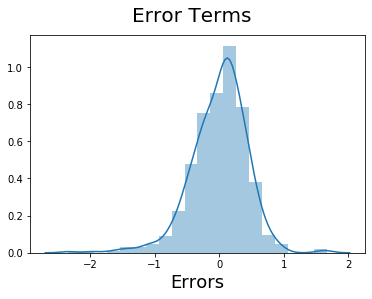

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)


### Making Predictions Using the Final Model

In [65]:
#Applying the scaling on the test sets
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [66]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# # Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_test_pred = lr_5.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

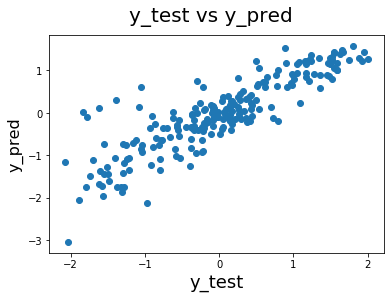

In [69]:
#Let's now plot the graph for actual versus predicted values.
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [70]:
# calculate the R-squared score on the test set.
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7677966848862655

### Conclusion



#### The assumptions of Linear Regression after building the model on the training set are as following :

- There exists a linear relationship between the independent variable and the dependent variable.
- The testing and training  accuracy are nearly equal 
- The error terms are normally distributed.

#### Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes
- yr_2019  
- weathersit_Light Snow 
- season_summer

